In [45]:
import sys
import os

project_root = os.path.abspath('../..')
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [46]:

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

%config InlineBackend.figure_formats = ['svg']


from catan.core import Game
from catan.core.models.player import RandomPlayer, Color, Player

### Measure win rates

Completed playout 1
Completed playout 2
Completed playout 3
Completed playout 4
Completed playout 5
Completed playout 6
Completed playout 7
Completed playout 8
Completed playout 9
Completed playout 10
Completed playout 11
Completed playout 12
Completed playout 13
Completed playout 14
Completed playout 15
Completed playout 16
Completed playout 17
Completed playout 18
Completed playout 19
Completed playout 20
Completed playout 21
Completed playout 22
Completed playout 23
Completed playout 24
Completed playout 25
Completed playout 26
Completed playout 27
Completed playout 28
Completed playout 29
Completed playout 30
Completed playout 31
Completed playout 32
Completed playout 33
Completed playout 34
Completed playout 35
Completed playout 36
Completed playout 37
Completed playout 38
Completed playout 39
Completed playout 40
Completed playout 41
Completed playout 42
Completed playout 43
Completed playout 44
Completed playout 45
Completed playout 46
Completed playout 47
Completed playout 48
C

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([-0.02,  0.03,  0.08,  0.13,  0.18,  0.23,  0.28,  0.33,  0.38,
         0.43,  0.48,  0.53,  0.58,  0.63,  0.68,  0.73,  0.78,  0.83,
         0.88,  0.93,  0.98]),
 <BarContainer object of 20 artists>)

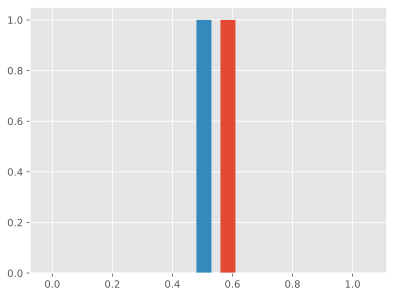

In [47]:

rand_2_players = [
    RandomPlayer(color=Color.BLUE, is_bot=True),
    RandomPlayer(color=Color.RED, is_bot=True)
]

def playout(players):
    game = Game(players=players)
    game.play()
    
    return (game.state.num_turns, game.winning_color())


def win_rate(expected_winner_color, players, n_playouts):
    wins = 0
    
    for i in range(n_playouts):
        _, winner_color = playout(players)
        if winner_color == expected_winner_color:
            wins += 1
        print("Completed playout", i+1)
            
    return wins / n_playouts


plt.hist(
    win_rate(Color.RED, rand_2_players, 100), 
    bins=20)
plt.hist(
    win_rate(Color.BLUE, rand_2_players, 100), 
    bins=20)


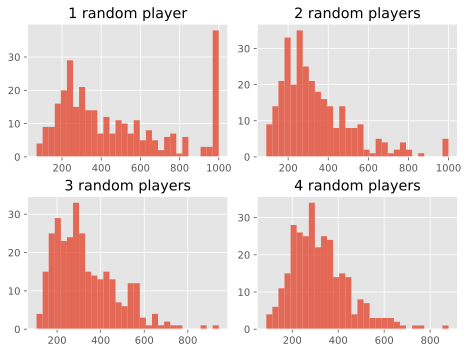

In [48]:
def n_playout_steps(players, n_playouts):
    return [playout(players)[0] for _ in range(n_playouts)]

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, layout='constrained')

ax0.hist(
    x=n_playout_steps([
        RandomPlayer(color=Color.BLUE), 
    ], 300),
    alpha=0.8,
    bins=30,
)
ax0.set_title("1 random player")

ax1.hist(
    x=n_playout_steps([
        RandomPlayer(color=Color.BLUE),
        RandomPlayer(color=Color.RED),
    ], 300),
    alpha=0.8,
    bins=30
)
ax1.set_title("2 random players")

ax2.hist(
    x=n_playout_steps([
        RandomPlayer(color=Color.BLUE),
        RandomPlayer(color=Color.RED),
        RandomPlayer(color=Color.ORANGE),
    ], 300),
    alpha=0.8,
    bins=30
)
ax2.set_title("3 random players")

ax3.hist(
    x=n_playout_steps([
        RandomPlayer(color=Color.BLUE),
        RandomPlayer(color=Color.RED),
        RandomPlayer(color=Color.ORANGE),
        RandomPlayer(color=Color.WHITE),
    ], 300),
    alpha=0.8,
    bins=30
)
ax3.set_title("4 random players")

plt.show()

### MCTS scheme

In [50]:
import catan.bots.mcts as mcts


class MCTSPlayer(Player):
    def __init__(self, color):
        super().__init__(color, is_bot = True)
        
        self.mcts_player = RandomPlayer(color=Color.BLUE, is_bot=True)
        self.opponent_player = RandomPlayer(color=Color.RED, is_bot=True)
        
        self.mcts_tree = mcts.MCTS(exploration_constant=1.414)
        
        
    def __find_best_action(self, mcts_game_state: mcts.MCTSCatanGameState):
        while not mcts_game_state.is_terminal():
            player = mcts_game_state.get_current_player()
            best_action = self.mcts_tree.simulate(mcts_game_state, 10)
            mcts_game_state = mcts_game_state.take_action(best_action)
            
            if player == mcts.PLAYER_ONE:
                # print(best_action)
                
                return best_action
            
            
    def decide(self, game, playable_actions):
        mcts_game_state: mcts.MCTSGameState = mcts.MCTSCatanGameState(
            players=[self.mcts_player, self.opponent_player],
            game=game
        )
        # print(playable_actions)
        
        return self.__find_best_action(mcts_game_state)


win_rate(
    expected_winner_color=Color.BLUE, 
    players=[
        MCTSPlayer(color=Color.BLUE), 
        RandomPlayer(color=Color.RED, is_bot=True)
    ],
    n_playouts=5
)


Completed playout 1
Completed playout 2
Completed playout 3


KeyboardInterrupt: 